In [1]:
# %load /home/sid/libs.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.io.arff import loadarff
%matplotlib inline

In [2]:
def test_data_prep(*files):
    test_data = [pd.DataFrame(loadarff(file)[0]) for file in files]
    for i in range(len(test_data)):
        test_data[i]['class'].replace([b'0', b'1'], [0, 1], inplace = True)
    return test_data

In [3]:

test_df = test_data_prep('data/1year.arff', 'data/2year.arff', 'data/3year.arff', 'data/4year.arff', 'data/5year.arff')
test_df

[         Attr1     Attr2     Attr3      Attr4     Attr5     Attr6     Attr7  \
 0     0.200550  0.379510  0.396410    2.04720   32.3510  0.388250  0.249760   
 1     0.209120  0.499880  0.472250    1.94470   14.7860  0.000000  0.258340   
 2     0.248660  0.695920  0.267130    1.55480   -1.1523  0.000000  0.309060   
 3     0.081483  0.307340  0.458790    2.49280   51.9520  0.149880  0.092704   
 4     0.187320  0.613230  0.229600    1.40630   -7.3128  0.187320  0.187320   
 5     0.228220  0.497940  0.359690    1.75020  -47.7170  0.000000  0.281390   
 6     0.111090  0.647440  0.289710    1.47050    2.5349  0.000000  0.111090   
 7     0.532320  0.027059  0.705540   53.95400  299.5800  0.000000  0.652400   
 8     0.009020  0.632020  0.053735    1.12630  -37.8420  0.000000  0.014434   
 9     0.124080  0.838370  0.142040    1.16940  -91.8830  0.000000  0.153280   
 10    0.240010  0.443550  0.188350    1.44000  -21.1650 -0.931900  0.240010   
 11   -0.027117  0.111480  0.119890    2

In [4]:
def test_train_splitter(data):
    X_train_2 = []
    X_test_2 = []
    y_train_2 = []
    y_test_2 = []
    for i in range(len(data)):
        X, y = data[i].iloc[:,:-1], data[i]['class']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)
        X_train_2.append(X_train)
        X_test_2.append(X_test)
        y_train_2.append(y_train)
        y_test_2.append(y_test)
    X_train_fin = pd.concat(X_train_2)
    X_test_fin = pd.concat(X_test_2)
    y_train_fin = pd.concat(y_train_2)
    y_test_fin = pd.concat(y_test_2)
    return X_train_fin, X_test_fin, y_test_fin, y_train_fin
        
X_train, X_test, y_test, y_train = test_train_splitter(test_df)

X_train2 = X_train.reset_index(drop=True)
X_test2 = X_test.reset_index(drop=True)
y_test2 = y_test.reset_index(drop=True)
y_train2 = y_train.reset_index(drop=True)


In [5]:
X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape

((34722, 64), (34722,), (8683, 64), (8683,))

In [11]:
def get_me_mah_model(X_train, y_train, X_test, y_test, Model):
    model = Model(random_state=9, n_estimators=100)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print "f1_score", f1_score(y_test, y_pred)
    print "precision_score", precision_score(y_test, y_pred)
    print "recall_score", recall_score(y_test, y_pred)
    print "roc_auc_score", roc_auc_score(y_test, y_pred)
    print "cm matrix", confusion_matrix(y_test, y_pred)
    scores = [n for m, n in model.predict_proba(X_test)]
    fpr, tpr, thresholds = roc_curve(y_test, scores)
    plt.plot(fpr, tpr)
    plt.plot([(0,0), (1,1)])
    len(y_test[y_test == 1])

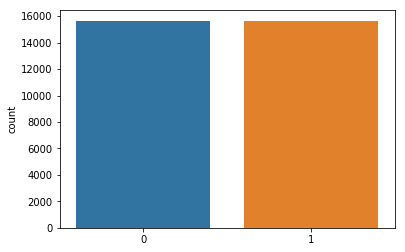

In [7]:
X_train3 = X_train2.dropna()
y_train3 = y_train2.iloc[X_train3.index]
X_test3 = X_test2.dropna()
y_test3 = y_test2.iloc[X_test3.index]
smote = SMOTE(random_state=9, kind = 'borderline2')
X_smote, y_smote = smote.fit_sample(X_train3, y_train3)
sns.countplot(y_smote)
plt.show()

f1_score 0.0833976833977
precision_score 0.044925124792
recall_score 0.58064516129
roc_auc_score 0.642384436315
cm matrix [[2732 1148]
 [  39   54]]


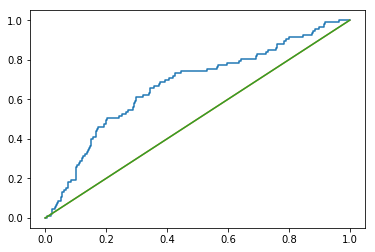

In [8]:
get_me_mah_model(X_smote, y_smote, X_test3, y_test3, LogisticRegression)

In [9]:
from sklearn.ensemble import RandomForestClassifier

f1_score 0.258064516129
precision_score 0.258064516129
recall_score 0.258064516129
roc_auc_score 0.620140505487
cm matrix [[3811   69]
 [  69   24]]


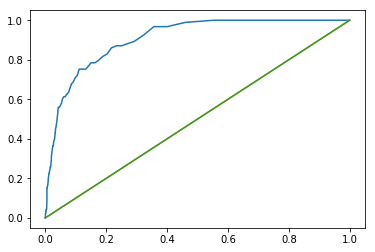

In [12]:
get_me_mah_model(X_smote, y_smote, X_test3, y_test3, RandomForestClassifier)

In [ ]:
RandomForestClassifier(n_estimators=)

f1_score 0.258064516129
precision_score 0.258064516129
recall_score 0.258064516129
roc_auc_score 0.620140505487
cm matrix [[3811   69]
 [  69   24]]


93

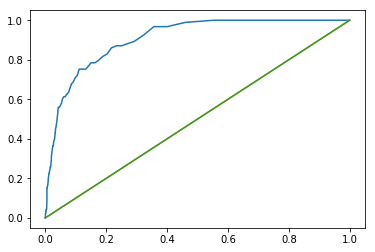

In [14]:
model = RandomForestClassifier(random_state=9, n_estimators=100)
model.fit(X_smote, y_smote)
y_pred = model.predict(X_test3)
print "f1_score", f1_score(y_test3, y_pred)
print "precision_score", precision_score(y_test3, y_pred)
print "recall_score", recall_score(y_test3, y_pred)
print "roc_auc_score", roc_auc_score(y_test3, y_pred)
print "cm matrix", confusion_matrix(y_test3, y_pred)
scores = [n for m, n in model.predict_proba(X_test3)]
fpr, tpr, thresholds = roc_curve(y_test3, scores)
plt.plot(fpr, tpr)
plt.plot([(0,0), (1,1)])
len(y_test3[y_test3 == 1])

In [17]:
model.feature_importances_[np.argsort(model.feature_importances_)]

array([ 0.00446995,  0.00489075,  0.00516778,  0.00521491,  0.00526818,
        0.00554877,  0.0055535 ,  0.00610526,  0.00610847,  0.00613949,
        0.00635331,  0.006382  ,  0.00649019,  0.00652194,  0.00653583,
        0.00665038,  0.0067042 ,  0.00679022,  0.0070472 ,  0.00710217,
        0.00712339,  0.00712956,  0.00745446,  0.00759723,  0.00761135,
        0.00773592,  0.00808479,  0.00837122,  0.00887965,  0.00888399,
        0.00889651,  0.00916549,  0.0093724 ,  0.00948529,  0.00961771,
        0.00970106,  0.01069388,  0.01072127,  0.01073621,  0.01190839,
        0.01206381,  0.01268081,  0.01295267,  0.01316861,  0.01330625,
        0.0159582 ,  0.01747456,  0.01753865,  0.0177253 ,  0.01857919,
        0.02167489,  0.02272026,  0.02310322,  0.02421208,  0.02569567,
        0.02783907,  0.03040654,  0.03164841,  0.03474084,  0.03542266,
        0.05114959,  0.05187129,  0.06128591,  0.1065672 ])

In [20]:
features_imp = pd.Series(data=model.feature_importances_, index=X_test3.columns)

In [30]:
features_imp.sort_values(ascending=False)

Attr34    0.106567
Attr15    0.061286
Attr13    0.051871
Attr26    0.051150
Attr41    0.035423
Attr16    0.034741
Attr39    0.031648
Attr25    0.030407
Attr9     0.027839
Attr6     0.025696
Attr27    0.024212
Attr5     0.023103
Attr23    0.022720
Attr38    0.021675
Attr37    0.018579
Attr29    0.017725
Attr19    0.017539
Attr35    0.017475
Attr58    0.015958
Attr62    0.013306
Attr2     0.013169
Attr46    0.012953
Attr61    0.012681
Attr24    0.012064
Attr32    0.011908
Attr7     0.010736
Attr1     0.010721
Attr51    0.010694
Attr10    0.009701
Attr55    0.009618
            ...   
Attr42    0.008884
Attr30    0.008880
Attr44    0.008371
Attr11    0.008085
Attr36    0.007736
Attr60    0.007611
Attr22    0.007597
Attr49    0.007454
Attr40    0.007130
Attr14    0.007123
Attr33    0.007102
Attr21    0.007047
Attr57    0.006790
Attr20    0.006704
Attr31    0.006650
Attr3     0.006536
Attr47    0.006522
Attr52    0.006490
Attr48    0.006382
Attr45    0.006353
Attr18    0.006139
Attr17    0.